# WeatherPy

### Analysis

-High humidity appears to occur in cities located between 40-60 latitude

-There is an exponential decrease in temperature from latitudes 20 to 60.  For every 20 degrees in latitude, temperature decreases by 20 degrees farenheit.

-Cities in Latitudes 40-60, appear to have the highest wind speed.

In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import requests as req
import json
import time

#import API keys
from localenv import wkey

In [2]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid = wkey
settings = {"units": "imperial", "appid": wkey}
query_url = f"{url}appid={wkey}&units={units}&q="

In [3]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q='

In [4]:
#create empty lists
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [5]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [6]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(550)

In [7]:
count = 0
weather_json = []

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + wkey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
        weather_json.append(cityweather)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
    except:
        #print(f"No data for this city: {row['city']}")
        print(f"Processing Record {count} | {row['city']}")
        print(query_url)

print("-"*100)
print("                Data Retrieval Complete")
print("-"*100)


Processing Record 1 | hope
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=hope
Processing Record 2 | banyo
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=banyo
Processing Record 3 | narasannapeta
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=narasannapeta
Processing Record 4 | barra do garcas
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=barra do garcas
Processing Record 5 | tahe
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=tahe
Processing Record 6 | xuanzhou
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=xuanzhou
Processing Record 7 | swinford
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=swinfo

Processing Record 59 | acarau
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=acarau
Processing Record 60 | gotsu
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=gotsu
Processing Record 61 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=marcona
Processing Record 62 | hurghada
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=hurghada
Processing Record 63 | valdez
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=valdez
Processing Record 64 | juba
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=juba
Processing Record 65 | oskemen
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=oskemen
Processing Record 

Processing Record 116 | norwich
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=norwich
Processing Record 117 | hirado
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=hirado
Processing Record 118 | darlowo
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=darlowo
Processing Record 119 | mezen
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=mezen
Processing Record 120 | estevan
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=estevan
Processing Record 121 | recodo
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=recodo
Processing Record 122 | amantea
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=amantea
Process

Processing Record 173 | limbang
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=limbang
Processing Record 174 | dmytrivka
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=dmytrivka
Processing Record 175 | point fortin
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=point fortin
Processing Record 176 | tolbazy
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=tolbazy
Processing Record 177 | alta gracia
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=alta gracia
Processing Record 178 | dzerzhinsk
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=dzerzhinsk
Processing Record 179 | gambela
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad7

Processing Record 229 | mayor pablo lagerenza
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=mayor pablo lagerenza
Processing Record 230 | khartoum
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=khartoum
Processing Record 231 | dana point
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=dana point
Processing Record 232 | kolarovo
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=kolarovo
Processing Record 233 | lapeer
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=lapeer
Processing Record 234 | gabu
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=gabu
Processing Record 235 | bay city
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05

Processing Record 286 | paracuru
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=paracuru
Processing Record 287 | montrose
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=montrose
Processing Record 288 | pitanga
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=pitanga
Processing Record 289 | pacifica
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=pacifica
Processing Record 290 | karla
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=karla
Processing Record 291 | jodhpur
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=jodhpur
Processing Record 292 | sarai alamgir
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q

Processing Record 343 | urbana
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=urbana
Processing Record 344 | annau
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=annau
Processing Record 345 | hansi
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=hansi
Processing Record 346 | jinka
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=jinka
Processing Record 347 | titesti
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=titesti
Processing Record 348 | kamsack
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=kamsack
Processing Record 349 | kranea elassonos
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=kranea elass

Processing Record 400 | tsybuliv
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=tsybuliv
Processing Record 401 | dalvik
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=dalvik
Processing Record 402 | borovskoy
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=borovskoy
Processing Record 403 | powassan
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=powassan
Processing Record 404 | lasa
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=lasa
Processing Record 405 | beruni
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=beruni
Processing Record 406 | liverpool
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=liverpo

Processing Record 458 | veseloyarsk
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=veseloyarsk
Processing Record 459 | chardara
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=chardara
Processing Record 460 | moerai
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=moerai
Processing Record 461 | juybar
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=juybar
Processing Record 462 | mahanje
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=mahanje
Processing Record 463 | solone
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=solone
Processing Record 464 | tierralta
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=t

Processing Record 515 | langsa
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=langsa
Processing Record 516 | ichhawar
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=ichhawar
Processing Record 517 | brumunddal
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=brumunddal
Processing Record 518 | vicente guerrero
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=vicente guerrero
Processing Record 519 | anahuac
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=anahuac
Processing Record 520 | tarija
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&units=imperial&q=tarija
Processing Record 521 | carros
http://api.openweathermap.org/data/2.5/weather?appid=1de9507ef2ae5b4ffdba82ea05ad73fd&uni

In [8]:
latitude = []
longtitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city = []
country = []
max_temp = []


for data in weather_json:
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
        lat1 = data.get("coord").get("lat")
        latitude.append(lat1)
        temp1 = data.get("main").get("temp")
        temperature.append(temp1)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
        humi1 = data.get("main").get("humidity")
        humidity.append(humi1)
        cld1 = data.get("clouds").get("all")
        cloudiness.append(cld1)
        wind1 = data.get("wind").get("speed")
        wind_speed.append(wind1)
        long1 = data.get("coord").get("lon")
        longtitude.append(long1)
        temp1 = data.get("main").get("temp_max")
        max_temp.append(temp1)
        
    except:
        pass

    continue

weather_dict = {"city":city, "Temperature (F)": temperature, "Latitude": latitude, "Longitude":longtitude, "Country":country,
                "Humidity": humidity, "Cloudiness":cloudiness,"Wind Speed":wind_speed, "Max_Temp":max_temp}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,Cloudiness,Country,Humidity,Latitude,Longitude,Max_Temp,Temperature (F),Wind Speed,city
0,90,CA,86,49.38,-121.43,37.40,37.40,9.17,Hope
1,80,CM,90,6.75,11.81,65.28,65.28,5.95,Banyo
2,0,IN,28,18.42,84.04,96.29,96.29,4.16,Narasannapeta
3,8,BR,92,-15.89,-52.26,71.72,71.72,3.49,Barra do Garcas
4,48,CN,57,52.34,124.71,10.38,10.38,5.73,Tahe


In [9]:
weather_df.count()

Cloudiness         498
Country            498
Humidity           498
Latitude           498
Longitude          498
Max_Temp           498
Temperature (F)    498
Wind Speed         498
city               498
dtype: int64

In [10]:
weather_df.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

### Latitude vs Temperature (F)

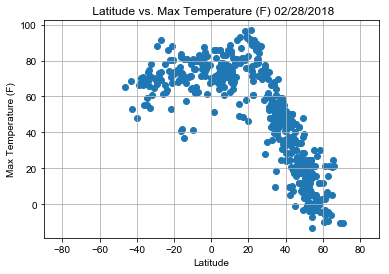

In [11]:
date = time.strftime("%m/%d/%Y")
plt.scatter(weather_df["Latitude"], 
            weather_df["Max_Temp"])
plt.title(f" Latitude vs. Max Temperature (F) {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
sns.set()
plt.savefig("Latitude vs Temperature (F).png")
plt.show()

### Latitude vs Humidity (%)

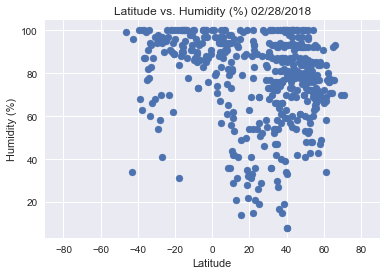

In [12]:
plt.scatter(weather_df["Latitude"], 
            weather_df["Humidity"])
plt.title(f"Latitude vs. Humidity (%) {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
sns.set()
plt.savefig("Latitude vs Humidity (%).png")
plt.show()

### Latitude vs. Cloudiness (%)

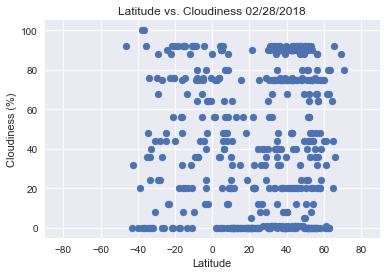

In [13]:
plt.scatter(weather_df["Latitude"], 
            weather_df["Cloudiness"])
plt.title(f"Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
sns.set()
plt.savefig("Latitude vs Cloudiness (%).png")
plt.show()

### Latitude vs Wind Speed (mph)

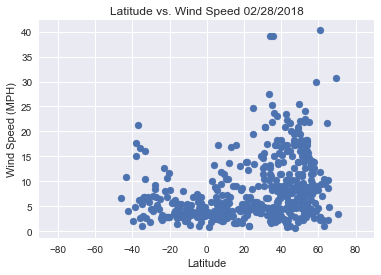

In [14]:
plt.scatter(weather_df["Latitude"], 
            weather_df["Wind Speed"])
plt.title(f"Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
sns.set()
plt.savefig("Latitude vs Wind Speed (MPH).png")
plt.show()